### 1. Reproduce the rank-sparsity relationship

To see if it corresponds with the exces-overlap results

In [2]:
from mix_forward import mix_forward
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm_notebook
display.set_matplotlib_formats('svg')

#### 1.1 Nm = 3

In [8]:
P = 40
K = 5
N = 100
M = 100
Nm = 3
Nc = 1000

In [9]:
moda3_f_rank = mix_forward(Nm,N,M,P,K,Nc)

In [10]:
record_rank_3 = np.zeros((3,50))

moda3_f_rank.generate_input()

flist = 10**np.linspace(-3,-0.7,50)

for m in tqdm_notebook(range(1,4)):
    
    for i,f in enumerate(flist):
        temp_m = moda3_f_rank.order_m(m,f=f)
        record_rank_3[m-1,i] = np.linalg.matrix_rank(temp_m)

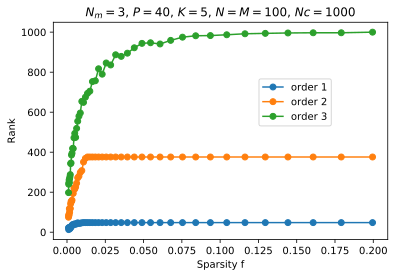

In [37]:
display.set_matplotlib_formats('svg')
for m in range(1,4):
    plt.plot(flist,record_rank_3[m-1,:],'o-',label='order {}'.format(m))

plt.legend(bbox_to_anchor=[0.6,0.5])
plt.title(r'$N_m =3$, $P=40$, $K=5$, $N=M=100$, $Nc=1000$')
#plt.xscale('log')
plt.xlabel('Sparsity f')
plt.ylabel('Rank')
plt.show()

In [51]:
P = 40
K = 5
N = 100
M = 100
Nm = 3
Nc_list2 = [2500,2300,2100,1900,1700,1500,1300,1100,1050,800,600]

In [53]:
flist = 10**np.linspace(-3,-0.7,50)
record_rank_rd3 = np.zeros((11,50))

for k in tqdm_notebook(range(11)):
    
    model3_f_Nc = mix_forward(Nm,N,M,P,K,Nc_list2[k])
    model3_f_Nc.generate_input()

    for i,f in enumerate(flist):
        record_rank_rd3[k,i] = np.linalg.matrix_rank(model3_f_Nc.order_m(3,f))

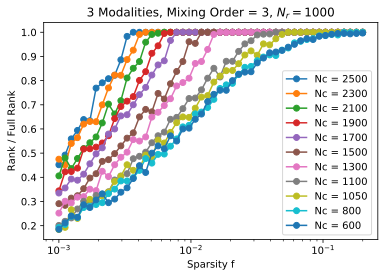

In [58]:
for k in range(11):
    plt.plot(flist,record_rank_rd3[k]/min(Nc_list2[k],1000),'o-',label='Nc = {}'.format(Nc_list2[k]))

plt.legend(bbox_to_anchor=[0.7,0.8])
plt.title(r'3 Modalities, Mixing Order = 3, $N_r = 1000$')
plt.xscale('log')
plt.xlabel('Sparsity f')
plt.ylabel('Rank / Full Rank')
plt.show()

In [65]:
res4 = np.loadtxt(r'Nc_transition_point.txt',skiprows=1)

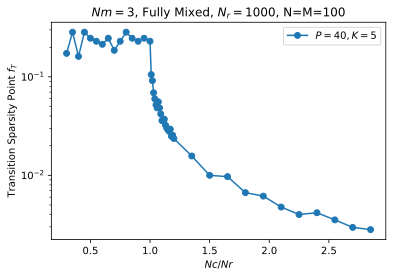

In [69]:
plt.plot(res4[0,:]/1000,res4[1,:],'o-',label=r'$P=40, K=5$')
plt.xlabel(r'$Nc/Nr$')
plt.ylabel(r'Transition Sparsity Point $f_T$')
plt.title(r'$Nm = 3$, Fully Mixed, $N_r = 1000$, N=M=100')
#ax = plt.gca()
#ax.get_xaxis().get_major_formatter().set_useOffset(False)
#plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.show()

#### 1.2 Nm=1, Unimodal, for comparison

In [17]:
P = 1000
K = 1
N = 100
M = 100
Nm = 1
Nc = 1000

In [18]:
moda1_f_rank = mix_forward(Nm,N,M,P,K,Nc)

In [19]:
record_rank_1 = np.zeros(50)

moda1_f_rank.generate_input()

flist = 10**np.linspace(-3,-0.7,50)

for i,f in enumerate(flist):
    temp_m = moda1_f_rank.order_m(1,f=f)
    record_rank_1[i] = np.linalg.matrix_rank(temp_m)

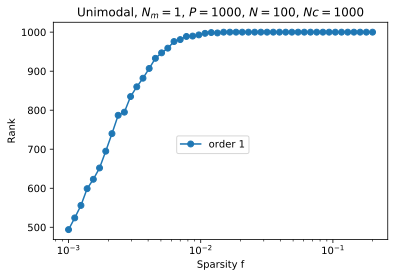

In [23]:
plt.plot(flist,record_rank_1,'o-',label='order 1')
plt.legend(bbox_to_anchor=[0.6,0.5])
plt.title(r'Unimodal, $N_m =1$, $P=1000$, $N=100$, $Nc=1000$')
plt.xscale('log')
plt.xlabel('Sparsity f')
plt.ylabel('Rank')
plt.show()

In [29]:
temp_m = moda1_f_rank.order_m(1,f=0.002)

In [30]:
(u,s,v) = np.linalg.svd(temp_m)

In [31]:
print((s > 10**(-12)).sum())
print(np.linalg.matrix_rank(temp_m))

700
700


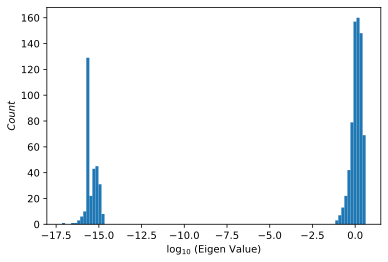

In [32]:
plt.hist(np.log10(s),bins=100)
plt.xlabel('$\log_{10}$ (Eigen Value)')
plt.ylabel('$Count$')
plt.show()

In [59]:
P = 1000
K = 1
N = 100
M = 100
Nm = 1
Nc_list = [2100,1700,1500,1300,1100,900,700]

In [60]:
record_rank_rd1 = np.zeros((7,50))
flist = 10**np.linspace(-3,-0.7,50)

for k in tqdm_notebook(range(7)):
    
    moda1_f_rank = mix_forward(Nm,N,M,P,K,Nc_list[k])
    moda1_f_rank.generate_input()
    
    for i,f in enumerate(flist):
        record_rank_rd1[k,i] = np.linalg.matrix_rank(moda1_f_rank.order_m(1,f))

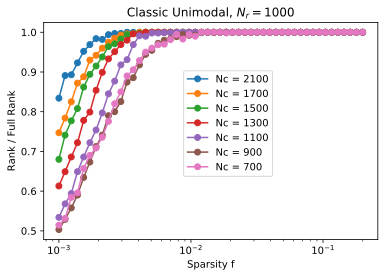

In [62]:
for k in range(7):
    plt.plot(flist,record_rank_rd1[k]/min(Nc_list[k],1000),'o-',label='Nc = {}'.format(Nc_list[k]))

plt.legend(bbox_to_anchor=[0.7,0.8])
plt.title(r'Classic Unimodal, $N_r = 1000$')
plt.xscale('log')
plt.xlabel('Sparsity f')
plt.ylabel('Rank / Full Rank')
plt.show()

#### 1.3 Random Matrix, For comparison

In [46]:
temp_h = np.random.randn(1000,1000)

In [47]:
record_rank_rd0 = np.zeros(50)
flist = 10**np.linspace(-3,-0.7,50)

for i,f in enumerate(flist):
    temp_m = mix_forward.fix_sparsity(_,temp_h,f=f)
    record_rank_rd0[i] = np.linalg.matrix_rank(temp_m)

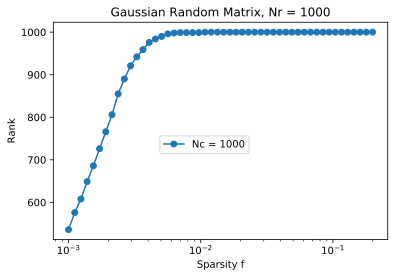

In [64]:
plt.plot(flist,record_rank_rd0,'o-',label='Nc = 1000')
plt.legend(bbox_to_anchor=[0.6,0.5])
plt.title(r'Gaussian Random Matrix, Nr = 1000')
plt.xscale('log')
plt.xlabel('Sparsity f')
plt.ylabel('Rank')
plt.show()

In [38]:
Nc_list = [2100,1700,1500,1300,1100,900,700]

In [40]:
record_rank_rd = np.zeros((7,50))
flist = 10**np.linspace(-3,-0.7,50)

for k in tqdm_notebook(range(7)):
    temp_h = np.random.randn(1000,Nc_list[k])
    
    for i,f in enumerate(flist):
        temp_m = mix_forward.fix_sparsity(_,temp_h,f=f)
        record_rank_rd[k,i] = np.linalg.matrix_rank(temp_m)

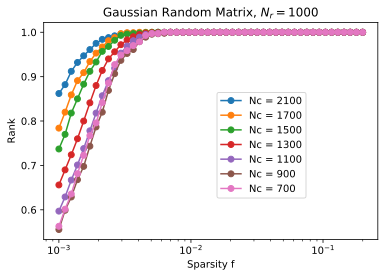

In [50]:
for k in range(7):
    plt.plot(flist,record_rank_rd[k]/min(Nc_list[k],1000),'o-',label='Nc = {}'.format(Nc_list[k]))

plt.legend(bbox_to_anchor=[0.8,0.7])
plt.title(r'Gaussian Random Matrix, $N_r = 1000$')
plt.xscale('log')
plt.xlabel('Sparsity f')
plt.ylabel('Rank')
plt.show()

### 2. Hebbian Readout

$W_{j}=\sum_{\mu=1}^{N_r}\left(\bar{m}_{j}^{\mu}-f\right) L^{m}$

In [ ]:
def hebbrule(m,label,f):
    N_r, N_c = m.shape
    

### 3. Elements distribution of h, as possible biological indication of the mixing order

In [71]:
P = 30
K = 2
N = 100
M = 100
Nm = 6
Nc = 1000

In [72]:
30*2**5

960

In [73]:
m_order = np.zeros((6,960,1000))
h_order = np.zeros((6,960,1000))
model_6_h = mix_forward(Nm,N,M,P,K,Nc)
model_6_h.generate_input()
f = 0.5

In [74]:
for m in tqdm_notebook(range(1,7)):
    m_order[m-1],h_order[m-1]= model_6_h.order_m(m,f=f,return_h=True)  

In [75]:
display.set_matplotlib_formats('svg')

In [83]:
C_h = np.matmul(h_order[0],h_order[0].T)

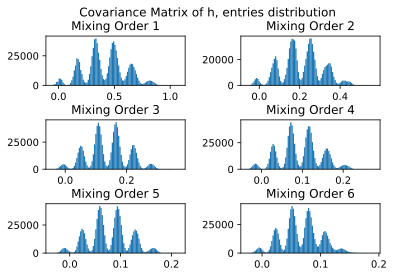

In [90]:
fig,ax = plt.subplots(3,2)
plt.subplots_adjust(wspace=0.4,hspace=0.7)
axs = ax.flatten()
for m in range(1,7):
    C_h = np.matmul(h_order[m-1],h_order[m-1].T).flatten()
    axs[m-1].hist(C_h/1000.,bins=100)
    axs[m-1].set_title('Mixing Order {}'.format(m))
plt.suptitle('Covariance Matrix of h, entries distribution')
plt.show()

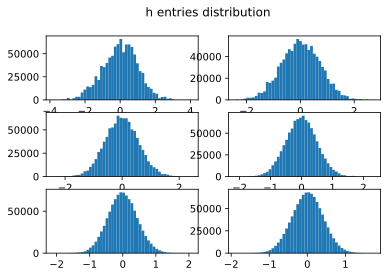

In [87]:
fig,ax = plt.subplots(3,2)
axs = ax.flatten()
for m in range(1,7):
    axs[m-1].hist(h_order[m-1].flatten(),bins=50)
plt.suptitle('h entries distribution')
plt.show()